In [6]:


df_acc_name, df_time_name = 'results_total.xlsx', 'total_time.xlsx'
df_acc, df_time = collect_data(df_acc_name, df_time_name)
df_acc.info(), df_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, ACSF1 to Yoga
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rmESN          119 non-null    float64
 1   ConvMESN       119 non-null    float64
 2   FEDformer      119 non-null    float64
 3   LSTNet         119 non-null    float64
 4   TimesNet       119 non-null    float64
 5   InceptionTime  119 non-null    float64
 6   COTE           119 non-null    float64
 7   Hydra          119 non-null    float64
 8   Rocket         119 non-null    float64
 9   MiniRocket     119 non-null    float64
 10  PARC           119 non-null    float64
dtypes: float64(11)
memory usage: 11.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, ACSF1 to Yoga
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rmESN          119 non-null    float64
 1   ConvMESN       119 non-null    float64

(None, None)

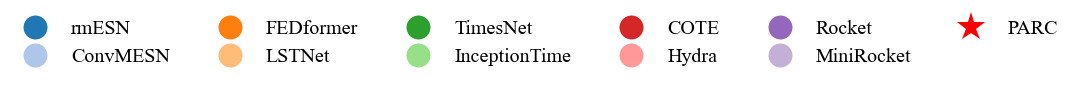

rmESN: 38
ConvMESN: 9568
FEDformer: 12619
LSTNet: 2436
TimesNet: 43540
InceptionTime: 46786
COTE: 949435
Hydra: 328
Rocket: 3577
MiniRocket: 511
PARC: 1623


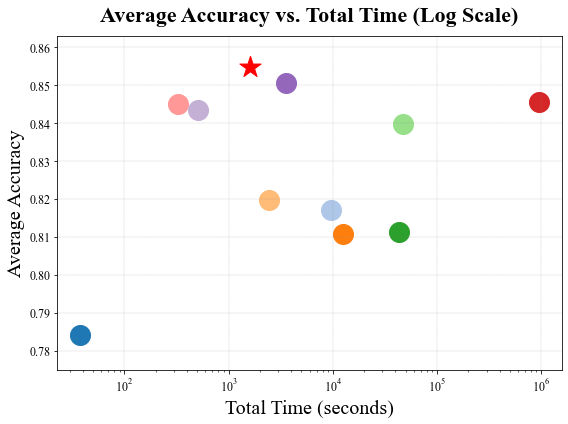

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
from adjustText import adjust_text
import matplotlib

matplotlib.rcParams['font.family'] = 'Times New Roman'
file_path = r'C:\Users\xycy1\Desktop\PeriodRes_AAAI\code\Comparison'

def match_indices(df_1, df_2):
    # 获取df_acc的索引
    target_indices = df_1.index
    
    # 过滤df_time，使其只保留在df_acc中存在的索引
    df_2_new = df_2[df_2.index.isin(target_indices)]
    
    return df_2_new

def collect_data(df_acc_name, df_time_name):
    acc_file_path = os.path.join(file_path, df_acc_name)
    time_file_path = os.path.join(file_path, df_time_name)
    df_acc = pd.read_excel(acc_file_path, sheet_name=0, engine='openpyxl')
    df_time = pd.read_excel(time_file_path, sheet_name=0, engine='openpyxl')

    # 将第一列设置为索引
    df_acc.set_index(df_acc.columns[0], inplace=True)
    df_time.set_index(df_time.columns[0], inplace=True)

    # 需要删除的行的列表
    indices_to_remove = [] #['PigAirwayPressure', 'MoteStrain', 'SyntheticControl', 'TwoPatterns', 'SmoothSubspace', 
    #                     'GestureMidAirD1', 'GestureMidAirD3', 'UWaveGestureLibraryX', 
    #                     'UWaveGestureLibraryZ', 'UWaveGestureLibraryY']

    # 删除指定索引的行
    df_acc.drop(indices_to_remove, errors='ignore', inplace=True)
    df_time = match_indices(df_acc, df_time)

    return df_acc, df_time

def plot_acc_time(df_acc, df_time, save_name):
    average_acc, total_time = df_acc.mean(axis=0), df_time.sum() 
    save_path = os.path.join(file_path, save_name)
    # 设置颜色映射，每个方法一个颜色
    colors = plt.cm.tab20(np.arange(len(df_acc.columns)))  # Set2

    # 创建图表
    plt.figure(figsize=(8, 6))
    texts = []
    for i, method in enumerate(df_acc.columns):
        x = total_time[i]
        y = average_acc[i]
        if method == 'PARC':
            # 特别标出 'ours' 方法
            plt.scatter(x, y, color='red', marker='*', s=500)
        else:
            plt.scatter(x, y, marker='o', color=colors[i], s=400) #  
        # 设置不同方法对应的形状

        # texts.append(plt.text(x, y, method, fontsize=15, ha='center', va='bottom'))
        # # 在数据点正下方添加方法名标签和其他信息
        # method_text = f"{average_acc[i]:.4f}%\n{total_time[i]:.1f}s"
        # texts.append(plt.text(x, y, method_text, fontsize=10, ha='center', va='top'))
        print(f"{method}: {total_time[i]:.0f}")

    # 字体大小和样式的额外设置
    title_font = {'fontsize': 22, 'fontweight': 'bold'}
    label_font = {'fontsize': 20}

    plt.title('Average Accuracy vs. Total Time (Log Scale)', **title_font, pad=15)
    plt.xlabel('Total Time (seconds)', **label_font)
    plt.ylabel('Average Accuracy', **label_font)
    plt.xscale('log')
    plt.ylim((0.775, 0.863))
    # 设置刻度字体大小
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.grid(True, linestyle='--', linewidth=0.2, color='grey')
    plt.tight_layout()  # 调整布局以防止标签被截断

    # 使用 adjust_text 来优化文本位置
    adjust_text(texts, expand_points=(0.6, 0.6))  # 可以调整 expand 参数以避免重叠 # , arrowprops = dict(arrowstyle='->', color='black')
    plt.tight_layout()
    plt.savefig(save_path, dpi=300, format="pdf", bbox_inches='tight') # 
    plt.show()

def plot_legend(df, save_name):
    methods = df.columns
    save_path = os.path.join(file_path, save_name)

    # 为每个方法生成一个颜色映射
    colors = plt.cm.tab20(np.arange(len(methods)))  # 使用不同的色彩映射，确保颜色的多样性

    # 创建图例的图形
    fig, ax = plt.subplots(figsize=(8, 2))  # 调整尺寸，确保图例不拥挤

    handles = []
    for i, method in enumerate(methods):
        if method == 'PARC':
            # 对于 'PARC' 方法，使用红色星星
            handle = plt.Line2D([0], [0], marker='*', color='none', markerfacecolor='red', markeredgewidth=0, markersize=30, label='PARC')
        else:
            handle = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=25, label=method)
        
        handles.append(handle)

    # 将图例分两行展示，并增大字体大小
    ax.legend(handles=handles, loc='center', ncol=6, frameon=False, fontsize=20)  # ncol 控制每行显示的图例数，增大字体大小

    ax.axis('off')  # 关闭坐标轴显示
    plt.subplots_adjust(left=0.05, right=0.95, top=0.75, bottom=0.25)  # 调整边距以减少白边
    plt.savefig(save_path, dpi=300, format="pdf", bbox_inches='tight')
    plt.show()

df_acc_name, df_time_name = 'results_total.xlsx', 'total_time.xlsx'
df_acc, df_time = collect_data(df_acc_name, df_time_name)

acc_time_name, acc_time_legend = 'acc_time.pdf', 'acc_time_legned.pdf'
plot_legend(df_acc, acc_time_legend)
plot_acc_time(df_acc, df_time, acc_time_name)


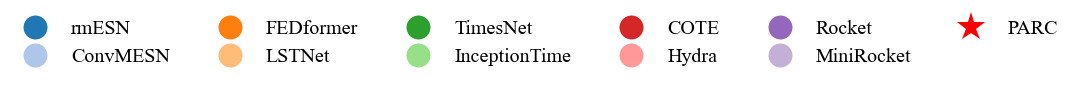

In [41]:


acc_time_legend = 'acc_time_legned.pdf'
plot_legend(df_acc, acc_time_legend)

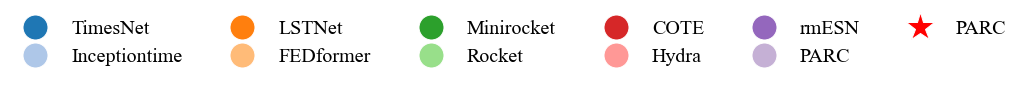

In [40]:
import matplotlib.pyplot as plt
import numpy as np


def plot_legend(df):
    # 假设的方法名称列表，这些名称应与你图表中使用的一致
    methods = df.columns

    # 为每个方法生成一个颜色映射
    colors = plt.cm.tab20(np.arange(len(methods)))  # 使用不同的色彩映射，确保颜色的多样性

    # 创建图例的图形
    fig, ax = plt.subplots(figsize=(8, 2))  # 调整尺寸，确保图例不拥挤
    handles = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=25, label=method)
        for i, method in enumerate(methods)
    ]
    handles.append(plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='red', markersize=30, label='PARC'))

    # 将图例分两行展示，并增大字体大小
    ax.legend(handles=handles, loc='center', ncol=6, frameon=False, fontsize='20')  # ncol 控制每行显示的图例数，增大字体大小

    ax.axis('off')  # 关闭坐标轴显示
    plt.subplots_adjust(left=0.05, right=0.95, top=0.75, bottom=0.25)  # 调整边距以减少白边
    plt.show()
    
plot_legend(df_acc)


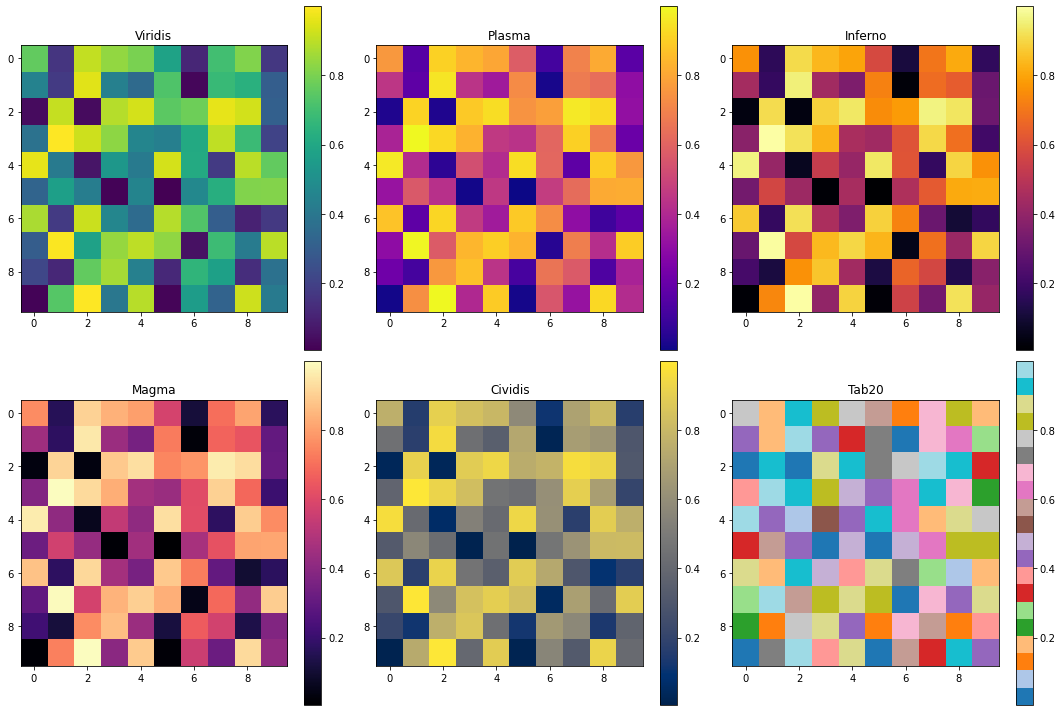

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一些数据
data = np.random.rand(10,10)

# 选择不同的颜色映射来显示
plt.figure(figsize=(15, 10))

# Viridis
plt.subplot(231)
plt.title('Viridis')
plt.imshow(data, cmap='viridis')
plt.colorbar()

# Plasma
plt.subplot(232)
plt.title('Plasma')
plt.imshow(data, cmap='plasma')
plt.colorbar()

# Inferno
plt.subplot(233)
plt.title('Inferno')
plt.imshow(data, cmap='inferno')
plt.colorbar()

# Magma
plt.subplot(234)
plt.title('Magma')
plt.imshow(data, cmap='magma')
plt.colorbar()

# Cividis
plt.subplot(235)
plt.title('Cividis')
plt.imshow(data, cmap='cividis')
plt.colorbar()

# Tab20
plt.subplot(236)
plt.title('Tab20')
plt.imshow(data, cmap='tab20')
plt.colorbar()

plt.tight_layout()
plt.show()
